# Multi-Armed Bandit Experiments

Section 1 runs through simulations of stationary bandit algorithms, and includes plots of performance (in average rewards) and optimal action percentage over time

Section 2 conducts a parameter study for:
 - $\epsilon$ in Epsilon-Greedy
 - $c$ in UCB
 - $\alpha$ in Gradient Update
 - $\alpha$ and $\beta$ initialization in Thompson Sampling 

   


## Stationary Bandit Algorithms 

### ***Greedy***

The Greedy algorithm always selects the action with the highest estimated reward:

   $$
    A_t = \arg\max_a Q_t(a)
$$

 - $Q_t(a)$ is the estimated reward for action $a$ at time $t$

The update rule follows an incremental average:

$$
Q_{t+1}(a) = Q_t(a) + \frac{1}{N_t(a)} \left[ R_t - Q_t(a) \right]
    $$

 - $R_t$ is the observed reward, and $N_t(a)$ is the number of times action $a$ has been selected.
   

### ***$\epsilon$-Greedy***

The $\epsilon$-Greedy algorithm balances exploration and exploitation:

   $$
    A_t =
    \begin{cases} 
    \arg\max_a Q_t(a), & \text{with probability } 1 - \epsilon \\
    \text{random action}, & \text{with probability } \epsilon
    \end{cases}
    $$
    
 - With probability $\epsilon$, select a **random action** (explore).
 - With probability (1 - $\epsilon$), select the **best-known action** (exploit)
       
The update rule remains:

$$
Q_{t+1}(a) = Q_t(a) + \frac{1}{N_t(a)} \left[ R_t - Q_t(a) \right]
$$

 - where $\epsilon$ controls the amount of exploration.


### ***Upper Confidence Bound (UCB)***

The UCB algorithm **optimistically explores** by considering **uncertainty** in action value estimates
   $$
    A_t = \arg\max_a \left[ Q_t(a) + c \sqrt{\frac{\ln t}{N_t(a)}} \right]
    $$
 - $c$ is an **exploration factor** that controls the amount of exploration.
 - $\frac{ln t}{N_t(a)}$ encourages selecting **less frequently tried actions**.

The action-value update remains:

$$
Q_{t+1}(a) = Q_t(a) + \frac{1}{N_t(a)} \left[ R_t - Q_t(a) \right]
$$


 ### ***Gradient Bandit***
 
 The Gradient Bandit algorithm **learns preferences** for actions instead of estimating rewards.

 The probability of selecting action $a$ at time $t$ is given by the **softmax policy**:
    $$
    \pi_t(a) = \frac{e^{H_t(a)}}{\sum_{b} e^{H_t(b)}}
    $$

 The action preferences $H_t(a)$ are updated using **stochastic gradient ascent**:
  $$
            H_{t+1}(a) = H_t(a) + \alpha \cdot (R_t - \bar{R}_t) \cdot (1 - \pi_t(a))
     $$

 For all other actions $b \neq a$:
$$
            H_{t+1}(b) = H_t(b) - \alpha \cdot (R_t - \bar{R}_t) \cdot \pi_t(b)
     $$

- $\alpha$ is the **learning rate** (step size).
- $\bar{R}_t$ is the **running average of received rewards**.
   



### ***Thompson Sampling***

Thompson Sampling is a **Bayesian approach** to the multi-armed bandit problem. It balances exploration and exploitation **probabilistically**, by maintaining **a belief distribution** over the reward of each action and selecting actions **according to their likelihood of being optimal**.

Thompson Sampling models the reward of each action using a **Beta distribution** (for binary rewards):
  $$
P(a) \sim \text{Beta}(\alpha_a, \beta_a)
  $$

- $\alpha_a$ represents the number of **successes** (positive rewards).
- $\beta_a$ represents the number of **failures** (negative rewards).

At each time step $t$:
1. **Sample a value** $\theta_a$ from each arm’s Beta distribution:

   $$
   \theta_a \sim \text{Beta}(\alpha_a, \beta_a)
   $$

2. **Select the action** with the highest sampled value:

   $$
   A_t = \arg\max_a \theta_a
   $$

3. **Update the parameters** after observing reward $R_t$:

   $$
   \alpha_a = \alpha_a + R_t
   $$

   $$
   \beta_a = \beta_a + (1 - R_t)
   $$

## Section 1: Performance  of stationary bandit algorithms

In [1]:
import sys
import os

# Get the absolute path of the project directory
project_root = os.path.abspath('..')  # Go up one level to the project root
if project_root not in sys.path:
    sys.path.append(project_root)

# Verify that reinforcement_learning is in sys.path
#print(sys.path)


In [2]:
import numpy as np
import matplotlib.pyplot as plt

from k_bandits.bandit import Bandit
from k_bandits.algorithms import Greedy, EpsilonGreedy, UCB, GradientBandit, ThompsonSampling
from k_bandits.experiment import run_experiment
from k_bandits.plots import plot_results

### Define experiment parameters

In [16]:
k = 10 # number of arms
bandit_env = Bandit(k)

# define agent parameters
steps = 1000
runs = 2000

# define agents
agents = {
    "Greedy": (Greedy, {}),
    "Epsilon-Greedy (0.1)": (EpsilonGreedy, {"epsilon": 0.1}),
    "UCB (c=1)": (UCB, {"c": 1}),
    "Gradient (alpha=0.1)": (GradientBandit, {"alpha": 0.1}),
    "Thompson Sampling": (ThompsonSampling, {"alpha": 2, "beta":1})
}

### Run Experiments

In [17]:
# run experiments
results = {}
optimal_actions = {}

for name, (algo_class, params) in agents.items():
    avg_rewards, optimal_action = run_experiment(algo_class, params, k, steps, runs)
    results[name] = avg_rewards
    optimal_actions[name] = optimal_action


### Plot Algorithm Performance (Average Reward Over Time) and Optimal Action Percentage over time steps

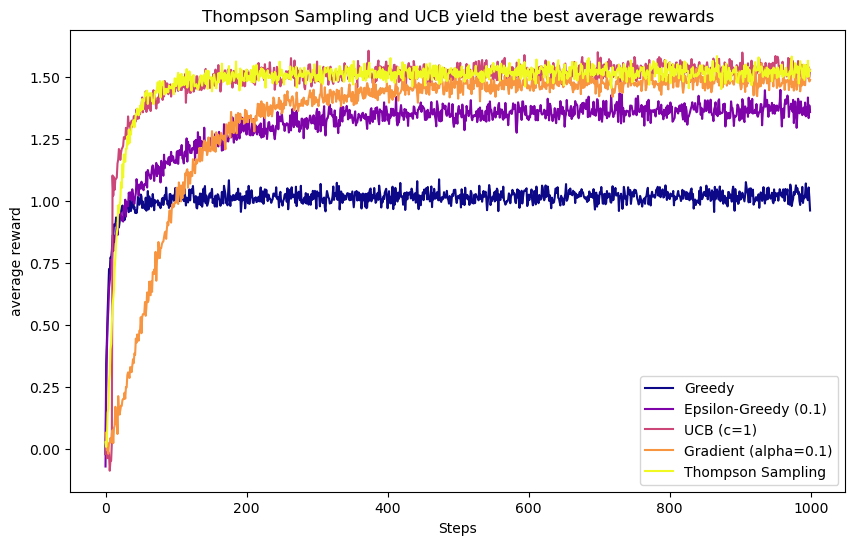

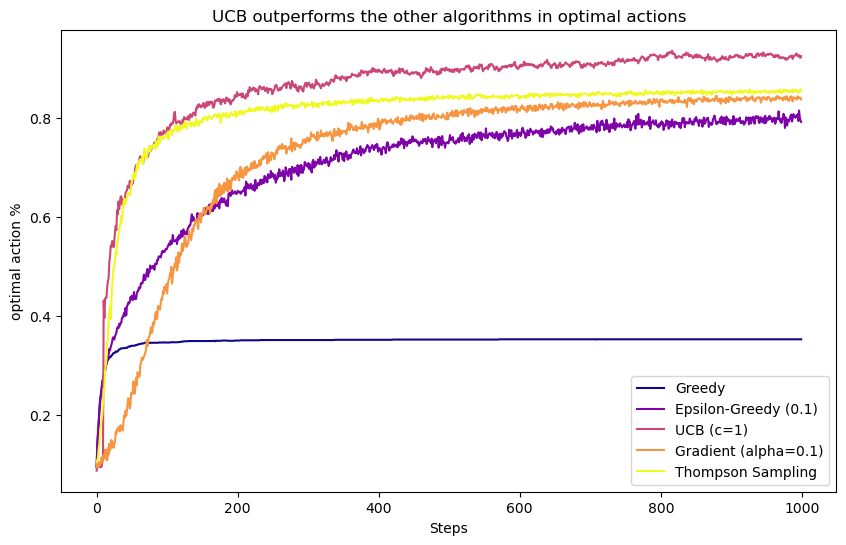

In [19]:
# plot results
plot_results(results, title = "Thompson Sampling and UCB yield the best average rewards", ylabel = "average reward")
plot_results(optimal_actions, title = "UCB outperforms the other algorithms in optimal actions", ylabel = "optimal action %")

## Section 2: Parameter Study

Each of the above algorithms has key parameters that influence their performance:

| Algorithm        | Key Parameter  | Meaning |
|-----------------|---------------|---------|
| **Epsilon-Greedy** | \( $\epsilon$ \) | Controls how often exploration happens |
| **UCB** | \( c \) | Determines the weight of exploration vs. exploitation |
| **Gradient Bandit** | \( $\alpha$ \) | Learning rate that controls preference updates |
| **Thompson Sampling** | \($\alpha_a$, $\beta_a$ \) | Track likelihood of success and failure | 

In the following section, we'll see how these parameters affect the **average reward** and **optimal action selection** over time.

### Parameter Study: ***$\epsilon$-Greedy*** with varying values of $\epsilon$

In [6]:
# set epsilon values to test and preallocate variables
epsilons = [0.01, 0.1, 0.3, 0.5]
eps_results = {}
eps_optimal = {}

for eps in epsilons:
    avg_reward, optimal_action = run_experiment(EpsilonGreedy, {"epsilon":eps}, k, steps, runs)
    eps_results[f"epsilon = {eps}"] = avg_reward
    eps_optimal[f"epsilon = {eps}"] = optimal_action


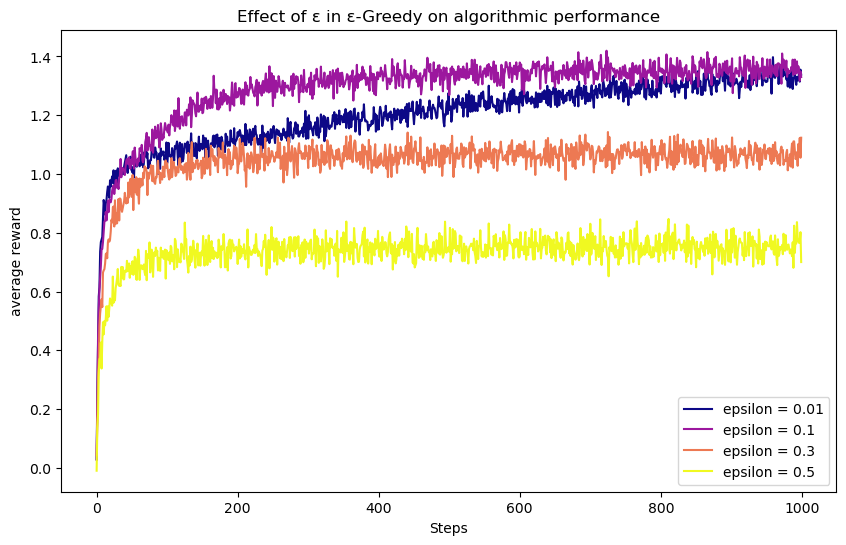

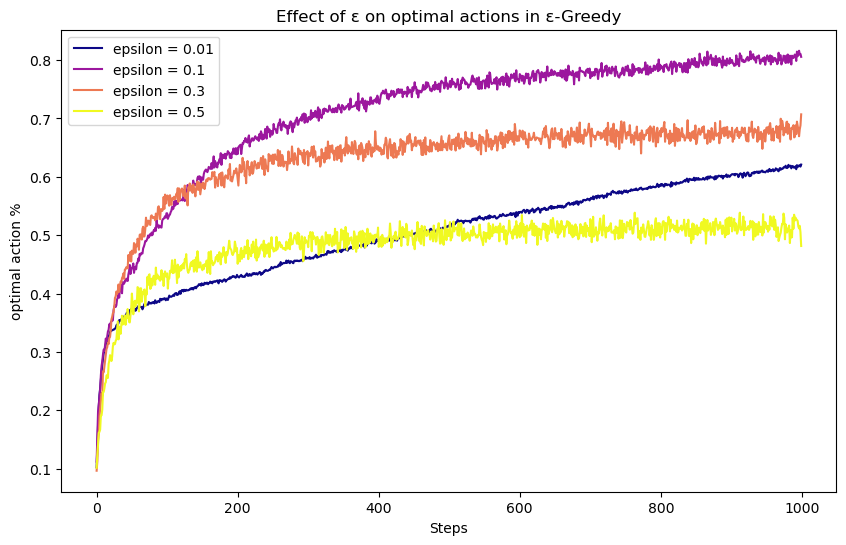

In [14]:
# plot results
plot_results(eps_results, title="Effect of \u03B5 in \u03B5-Greedy on algorithmic performance", ylabel = "average reward")
plot_results(eps_optimal, title= "Effect of \u03B5 on optimal actions in \u03B5-Greedy", ylabel = "optimal action %")

### Parameter Study: ***UCB*** with varying $c$ values

In [8]:
# set c values to test and preallocate variables
cs = [0.5, 1, 1.5, 2, 3, 5]
c_results = {}
c_optimal = {}

for c in cs: 
    avg_reward, optimal_action = run_experiment(UCB, {"c":c}, k, steps, runs)
    c_results[f"UCB (c = {c})"] = avg_reward
    c_optimal[f"UCB (c = {c})"] = optimal_action

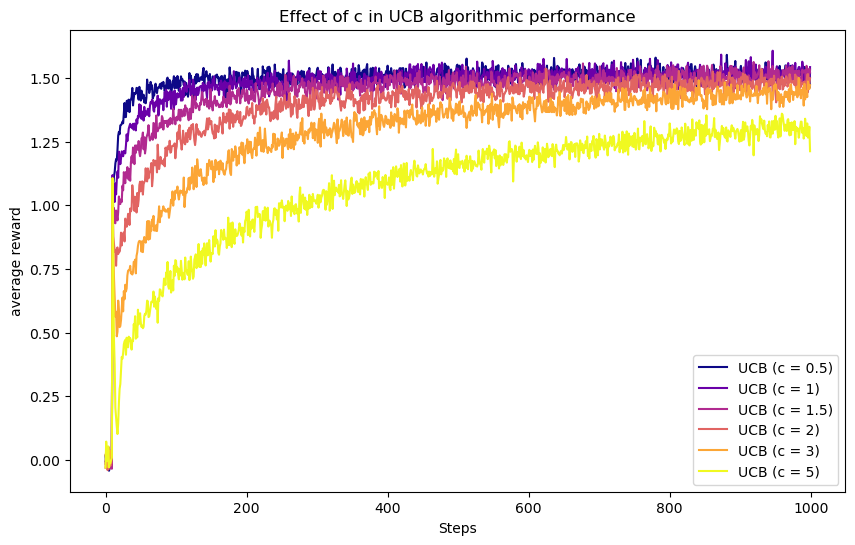

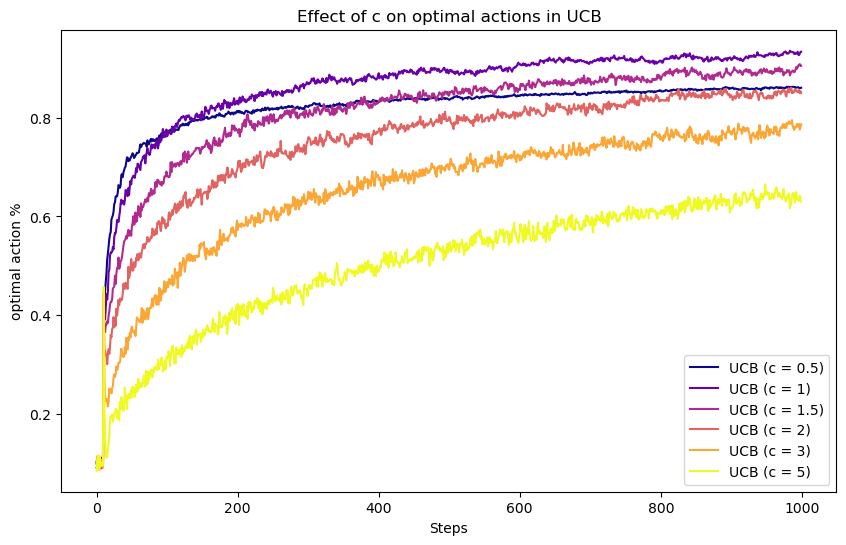

In [9]:
# plot results
plot_results(c_results, title = "Effect of c in UCB algorithmic performance", ylabel = 'average reward')
plot_results(c_optimal, title = "Effect of c on optimal actions in UCB", ylabel = 'optimal action %')

### Parameter Study: ***Gradient Bandit*** with varying $\alpha$ values

In [10]:
# set alpha values and preallocate variables 
alphas = [0.01, 0.1, 0.2, 0.5]
a_results = {}
a_optimal = {}

for alpha in alphas:
    avg_reward, optimal_action = run_experiment(GradientBandit, {"alpha":alpha}, k, steps, runs)
    a_results[f"Gradient (α = {alpha})"] = avg_reward
    a_optimal[f"Gradient (α = {alpha})"] = optimal_action


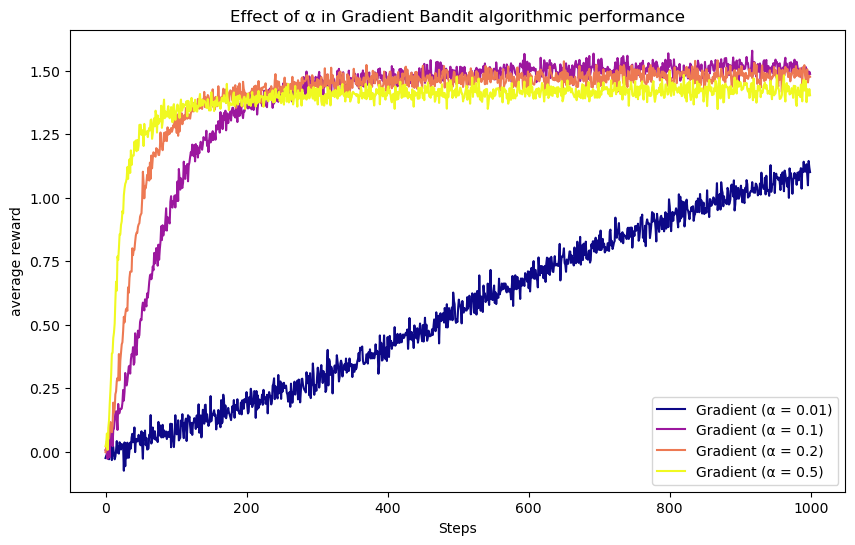

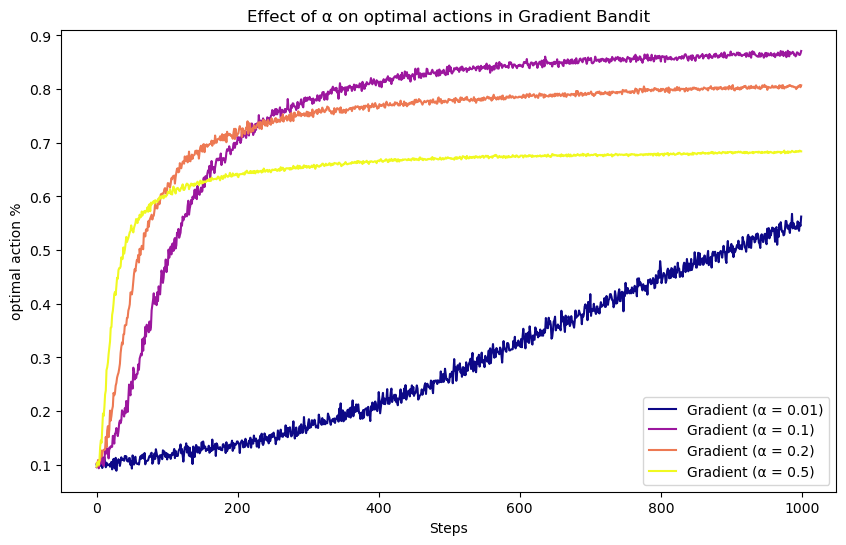

In [11]:
plot_results(a_results, title = "Effect of α in Gradient Bandit algorithmic performance", ylabel = "average reward")
plot_results(a_optimal, title = "Effect of α on optimal actions in Gradient Bandit", ylabel = "optimal action %")

### Parameter Study: ***Thompson Sampling*** with varying prior ($\alpha_a$, $\beta_a$) initiation

In [ ]:
# set priors to try and preallocate variables
prior_settings = [
    (1, 1), # default (Uniform prior)
    (2, 2), # More confident priors, but still neutral
    (2, 1), # Optimistic prior
    (1, 2) # Pessimistic prior
]
ts_results = {}
ts_optimal = {}

# run experiments
for alpha, beta in prior_settings:
    avg_reward, optimal_action = run_experiment(ThompsonSampling, {"alpha": alpha, "beta": beta}, k, steps, runs)
    ts_results[f"α={alpha}, β={beta}"] = avg_reward
    ts_optimal[f"α={alpha}, β={beta}"] = optimal_action

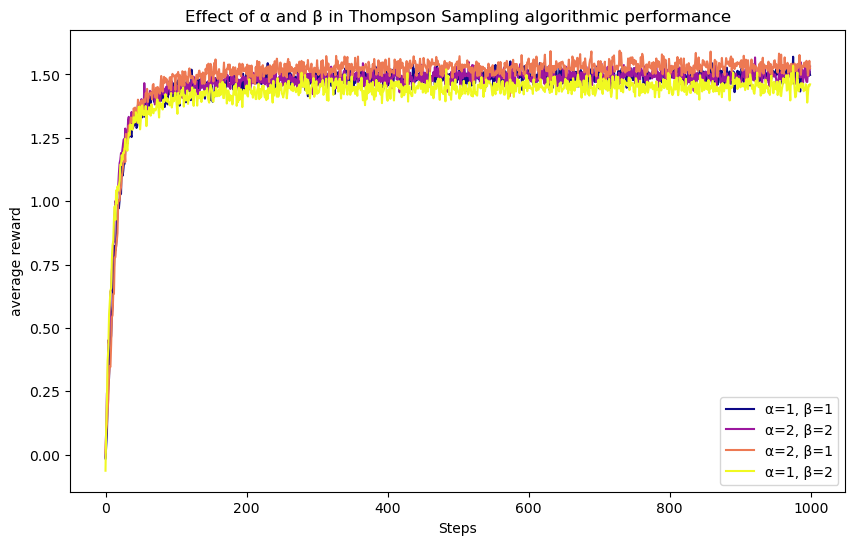

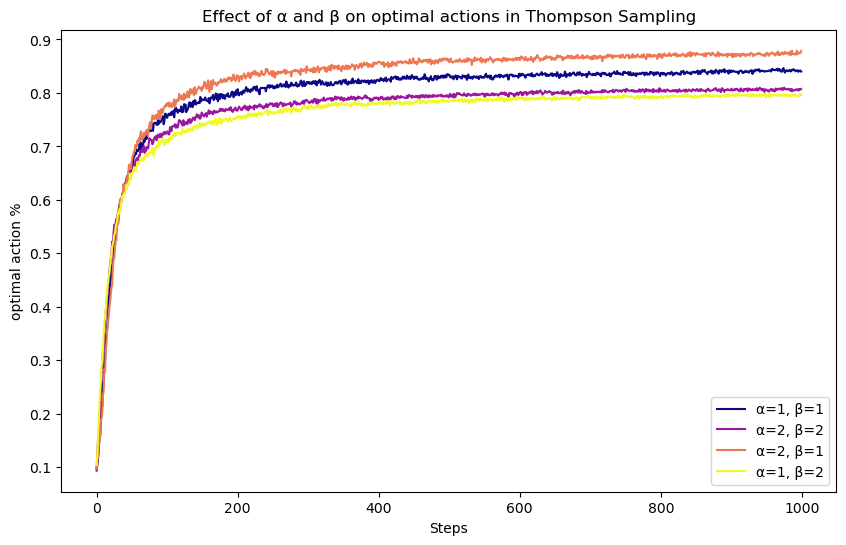

In [13]:
# plot results
plot_results(ts_results, title="Effect of α and β in Thompson Sampling algorithmic performance", ylabel="average reward")
plot_results(ts_optimal, title="Effect of α and β on optimal actions in Thompson Sampling", ylabel="optimal action %")

## Summary

| **Algorithm**  | **Strengths** | **Weaknesses** |
|---------------|--------------|--------------|
| **Greedy** | Simple, fast | Gets stuck in suboptimal actions |
| **Epsilon-Greedy** | Simple balance of exploration | Doesn't adapt exploration dynamically |
| **UCB** | Uses confidence intervals for exploration | Assumes rewards are stationary |
| **Gradient Bandit** | Works well for continuous rewards | Sensitive to learning rate **α** |
| **Thompson Sampling** | Optimally balances exploration/exploitation | Requires Bayesian modeling |
